# Tiền xử lý dữ liệu (Code của nhóm)

         Date  Buy Price (x1000đ/lượng)  Sell Price (x1000đ/lượng)
0  2009-08-01                     21.13                      21.19
1  2009-08-02                     21.13                      21.19
2  2009-08-03                     21.13                      21.19
3  2009-08-04                     21.13                      21.19
4  2009-08-05                     21.13                      21.19
            Date  Buy Price (x1000đ/lượng)  Sell Price (x1000đ/lượng)
5560  2024-12-28                      82.8                       85.3
5561  2024-12-29                      82.8                       85.3
5562  2024-12-30                      82.8                       85.3
5563  2024-12-31                      82.8                       85.3
5564  2025-01-01                      82.8                       85.3

Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5565 entries, 0 to 5564
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtyp

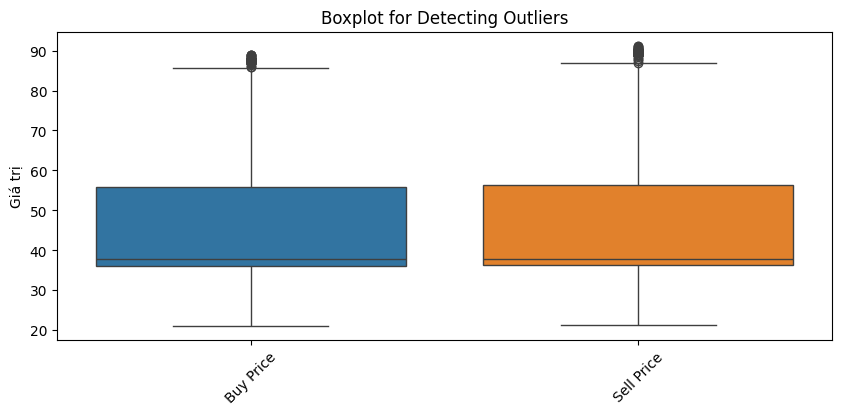

0
0
Date          datetime64[ns]
Buy Price            float64
Sell Price           float64
dtype: object
Kích thước dữ liệu trước khi xử lý outliers: (5565, 3)
Kích thước dữ liệu sau khi xử lý outliers: (5502, 3)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats

# Đọc dữ liệu
df = pd.read_csv("gold_prices.csv")

# Xem 5 dòng đầu và cuối
print(df.head())
print(df.tail(5))
print("\nThông tin dữ liệu:")
df.info()
print("\nThống kê mô tả dữ liệu:")
print(df.describe())
#Đổi tên cột
df.rename(columns={
    'Buy Price (x1000đ/lượng)': 'Buy Price',
    'Sell Price (x1000đ/lượng)': 'Sell Price'
}, inplace=True)
# Kiểm tra giá trị thiếu
missing_values = df.isnull().sum()
print("Số lượng giá trị thiếu trong mỗi cột:")
print(missing_values)


# Lọc các cột số liệu
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Vẽ boxplot
plt.figure(figsize=(10, 4))
sns.boxplot(data=df[numeric_columns])
plt.title('Boxplot for Detecting Outliers')
plt.xticks(rotation=45)
plt.ylabel('Giá trị')
plt.show()
# Vì kiểu dữ liệu cột Date đang ở dạng object
# -> Chuyển kiểu dữ liệu cột Date sang datetime
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes
# Đảm bảo dữ liệu được sắp xếp theo thời gian
df = df.sort_values(by='Date')
# Vì kiểu dữ liệu cột Date đang ở dạng object
# -> Chuyển kiểu dữ liệu cột Date sang datetime
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes
# Đảm bảo dữ liệu được sắp xếp theo thời gian
df = df.sort_values(by='Date')
# Kiểm tra Buy Price  và Sell Price có giá trị âm không
dem_BuyPrice_am = df[df['Buy Price'] < 0].shape[0]
print(dem_BuyPrice_am)

dem_SellPrice_am = df[df['Sell Price'] < 0].shape[0]
print(dem_SellPrice_am)
#Xử lý bằng cách: Thay thế giá trị âm bằng giá trị trung bình của cột
mean_buy = df[df['Buy Price'] >= 0]['Buy Price'].mean()
mean_sell = df[df['Sell Price'] >= 0]['Sell Price'].mean()
df['Buy Price'] = df['Buy Price'].apply(lambda x: mean_buy if x < 0 else x)
df['Sell Price'] = df['Sell Price'].apply(lambda x: mean_sell if x < 0 else x)


print(df.dtypes)

# In kích thước ban đầu
print(f"Kích thước dữ liệu trước khi xử lý outliers: {df.shape}")

# Copy dataframe
df_clean = df.copy()

# Chọn các cột số cần xử lý
cols = ['Buy Price', 'Sell Price']

for col in cols:
    Q1 = df_clean['Buy Price'].quantile(0.25)
    Q3 = df_clean['Sell Price'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

# In kích thước sau xử lý
print(f"Kích thước dữ liệu sau khi xử lý outliers: {df_clean.shape}")
df_clean.to_csv("gold_prices_clean.csv", index=False)

# Time-series forecasting with regression

In [2]:
# Import library
import pandas as pd
df=pd.read_csv('gold_prices_clean.csv')
df

,Date,Buy Price,Sell Price
0,01/08/2009,21.13,21.19
1,02/08/2009,21.13,21.19
2,03/08/2009,21.13,21.19
3,04/08/2009,21.13,21.19
4,05/08/2009,21.13,21.19
...,...,...,...
5497,28/12/2024,82.80,85.30
5498,29/12/2024,82.80,85.30
5499,30/12/2024,82.80,85.30
5500,31/12/2024,82.80,85.30


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5502 entries, 0 to 5501
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        5502 non-null   object 
 1   Buy Price   5502 non-null   float64
 2   Sell Price  5502 non-null   float64
dtypes: float64(2), object(1)
memory usage: 129.1+ KB


In [4]:
# Vì cột 'Date' đang ở dạng object
# -> Chuyển kiểu dữ liệu cột 'Date' sang datetime
import pandas as pd
# Chuyển đổi cột 'Date' sang kiểu dữ liệu datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Tạo cột 'Year' từ cột 'Date'
df['Year'] = df['Date'].dt.year

# Hiển thị DataFrame
df

,Date,Buy Price,Sell Price,Year
0,2009-08-01,21.13,21.19,2009
1,2009-08-02,21.13,21.19,2009
2,2009-08-03,21.13,21.19,2009
3,2009-08-04,21.13,21.19,2009
4,2009-08-05,21.13,21.19,2009
...,...,...,...,...
5497,2024-12-28,82.80,85.30,2024
5498,2024-12-29,82.80,85.30,2024
5499,2024-12-30,82.80,85.30,2024
5500,2024-12-31,82.80,85.30,2024


In [5]:
# Implementation with Python
import numpy as np
df['Time'] = np.arange(len(df.index))
df.head()

,Date,Buy Price,Sell Price,Year,Time
0,2009-08-01,21.13,21.19,2009,0
1,2009-08-02,21.13,21.19,2009,1
2,2009-08-03,21.13,21.19,2009,2
3,2009-08-04,21.13,21.19,2009,3
4,2009-08-05,21.13,21.19,2009,4


MAD: 7.321104827094697
SSE: 409301.346200365


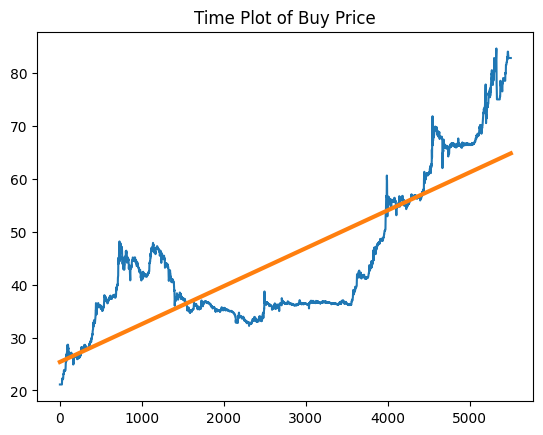

In [9]:
# Implementation with Python

from sklearn.linear_model import LinearRegression
# identify values of prediction
# Training data
X = df.loc[:, ['Time']]  # features
y = df.loc[:, 'Buy Price']  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as 
# the training data
y_pred = pd.Series(model.predict(X), index=X.index)

# Plot for y and y prediction
ax = y.plot()
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Buy Price');



# Calculate MAD (Mean Absolute Deviation)
mad = (y - y_pred).abs().mean()

# Calculate SSE (Sum of Squared Errors)
sse = ((y - y_pred) ** 2).sum()

print(f"MAD: {mad}")
print(f"SSE: {sse}")


MAD: 7.500885309738316
SSE: 432874.62585358624


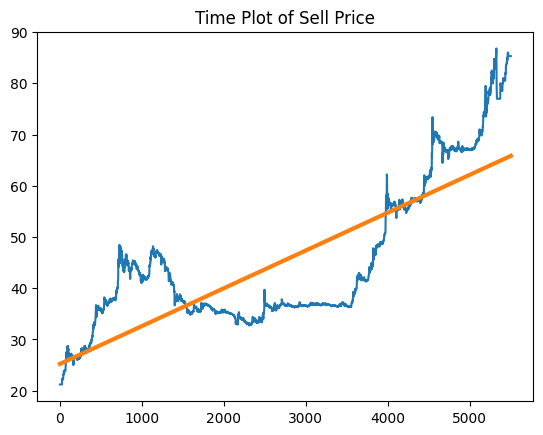

In [10]:
# Implementation with Python

from sklearn.linear_model import LinearRegression
# identify values of prediction
# Training data
X = df.loc[:, ['Time']]  # features
y = df.loc[:, 'Sell Price']  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as 
# the training data
y_pred = pd.Series(model.predict(X), index=X.index)

# Plot for y and y prediction
ax = y.plot()
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Sell Price');

# Calculate MAD (Mean Absolute Deviation)
mad = (y - y_pred).abs().mean()

# Calculate SSE (Sum of Squared Errors)
sse = ((y - y_pred) ** 2).sum()

print(f"MAD: {mad}")
print(f"SSE: {sse}")


# Đánh giá mô hình

# Them

## Akaike information Criterion (AIC) and Bayesian information Criterion (BIC)

In [11]:
import statsmodels.api as sm
#add constant to predictor variables
X = sm.add_constant(X)
#fit linear regression model
model = sm.OLS(y, X).fit()
#view model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              Buy Price   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     9570.
Date:                Sat, 10 May 2025   Prob (F-statistic):               0.00
Time:                        10:06:04   Log-Likelihood:                -19662.
No. Observations:                5502   AIC:                         3.933e+04
Df Residuals:                    5500   BIC:                         3.934e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.3821      0.233    109.138      0.0

## Từ hai trọng số này --> rồi tính dự báo + thực tế --> tính MAD + SSE

In [13]:
# R-squared: 0.635 
# và coef: const 25.3821 và Time 0.0072

import pandas as pd

# Hệ số hồi quy
const = 25.3821
coef_Time = 0.0072

# Tính giá trị dự báo
df['predicted_buy_price'] = const + coef_Time * df['Time']

# Hiển thị DataFrame
df

,Date,Buy Price,Sell Price,Year,Time,predicted_sales,predicted_buy_price
0,2009-08-01,21.13,21.19,2009,0,25.3821,25.3821
1,2009-08-02,21.13,21.19,2009,1,25.3893,25.3893
2,2009-08-03,21.13,21.19,2009,2,25.3965,25.3965
3,2009-08-04,21.13,21.19,2009,3,25.4037,25.4037
4,2009-08-05,21.13,21.19,2009,4,25.4109,25.4109
...,...,...,...,...,...,...,...
5497,2024-12-28,82.80,85.30,2024,5497,64.9605,64.9605
5498,2024-12-29,82.80,85.30,2024,5498,64.9677,64.9677
5499,2024-12-30,82.80,85.30,2024,5499,64.9749,64.9749
5500,2024-12-31,82.80,85.30,2024,5500,64.9821,64.9821
